# Construction of VGG16 network{-}
### Reference {-}:
- Simonyan, K., and Zisserman, A. 2014b. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, https://arxiv.org/abs/1409.1556.

## VGG16 architecture

![alt text](VGG16-architecture-1.png)

![alt text](VGG16-architecture-2.png)

Some characteristics of the VGG16 architecture:
- Kernel size of all convolutional layers is 3x3.
- Numbers of filters of every block are sequentially 64, 128, 256, 512, 512 as in the figure.
- All activation functions are ReLUs, except the output layer which uses softmax.
- Dropout probability used after dense layers is 0.5.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_datasets as tfds

In [ ]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)


In [ ]:
# Show shape of the training, test data, and validation
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))
print(f"Validation shape: X_val = {X_val.shape}, y_val = {y_val.shape}")


Train shape: X_train = (54000, 28, 28), y_train = (54000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)
Validation shape: X_val = (6000, 28, 28), y_val = (6000,)


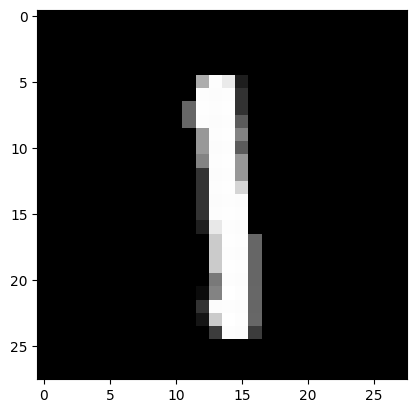

In [ ]:
# Install OpenCV library to process images.
!pip3 install opencv-python

# Show an image
plt.imshow(X_train[0,:,:], cmap='gray')
plt.show()

In [ ]:
#Resize Image

# def image_resize(X,y,batch_size, target_size = (56,56), color_mode ='RGB'):
#   while True:
#     indices = np.random.permutation(len(X))
#     for start in range(0, len(X), batch_size):
#       end = min(start + batch_size, len(X))
#       batch_X = []
#       batch_Y = []
#       for i in indices[start:end]:
#         img = X[i].astype('uint8')

#       #Conditional color mode conversion
#       if color_mode == 'RGB':
#         img = cv2.cvtColor(img,cv2.COLOr_GRAY2RGB)
#       elif color_mode == 'BGR':
#         img = cv2.cvtColor(img, cv2.COLOR_GRARYBGR)

#       #Resize the image
#       img_resized = cv2.resize(img, target_size)
#       batch_X.append(img_resized)
#       batch_Y.append(y[i])

#     yield np.array(batch_X), np.array(batch_Y)


In [ ]:
# image_resize function
# def image_resize(X, y, batch_size, target_size, color_mode):
#       n = len(X)
#       indices = np.arange(n)
#       for start in range(0, n, batch_size):
#         end = min(start + batch_size, n)
#         batch_X = []
#         batch_Y = []
#         for i in indices[start:end]:
#           img = X[i].astype('uint8')

#           if len(img.shape) == 2:  # Check if the image is grayscale
#             img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) #If grascale, convert to RGB

#           #Conditional color mode conversion
#           if color_mode == "RGB":
#             if img.shape[2] == 3:
#               img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#               img = np.expand_dims(img, axis=-1)


#           img = cv2.resize(img, target_size)
#           batch_X.append(img)
#           batch_Y.append(y[i])
#         yield (np.array(batch_X), np.array(batch_Y))

In [ ]:
def image_resize(X, y, batch_size, target_size = (56, 56)):
    while True:
        indices = np.random.permutation(len(X))
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            batch_X = []
            batch_y = []
            for i in indices[start:end]:
                img_resized = cv2.resize(cv2.cvtColor(X[i].astype('uint8'), cv2.COLOR_GRAY2RGB), target_size)
                batch_X.append(img_resized)
                batch_y.append(y[i])
            yield np.array(batch_X), np.array(batch_y)

In [ ]:
# # batch size
# # batch_size = 128
# # batch_size = 512
# batch_size = 256
# # Desired image size
# target_size = (56, 56)

# # Color mode of the image
# color_mode = "grayscale"
# # train, validation, and test generators
# train_resized = image_resize(X_train, y_train, batch_size, target_size, color_mode)
# val_resized = image_resize(X_val, y_val, batch_size, target_size, color_mode)
# test_resized = image_resize(X_test, y_test, batch_size, target_size, color_mode)

In [ ]:
batch_size = 256
# Desired image size
target_size = (56, 56)

# Color mode of the image
color_mode = "grayscale"
# train, validation, and test generators
train_resized = image_resize(X_train, y_train, batch_size)
val_resized = image_resize(X_val, y_val, batch_size)
test_resized = image_resize(X_test, y_test, batch_size)

**VGG16 MODEL**

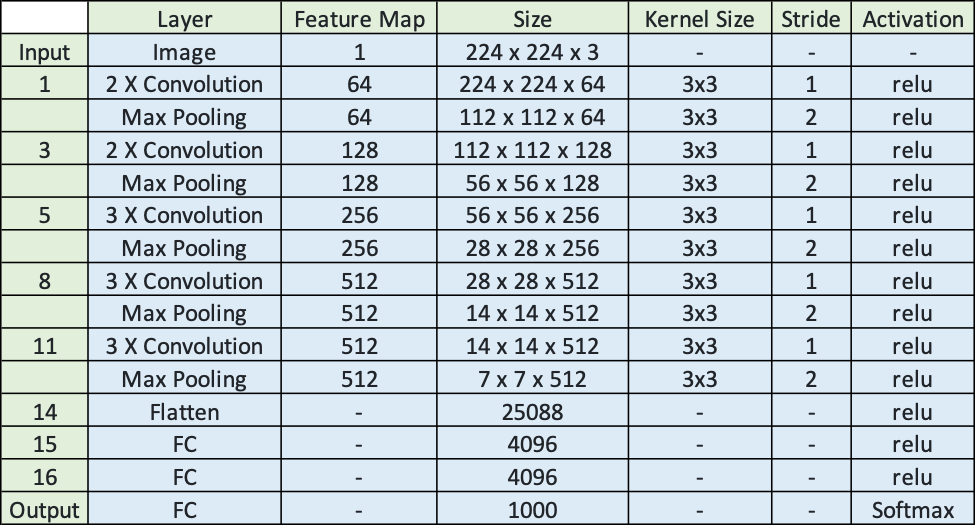

In [ ]:
# Import library
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Initialize VGG16 as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
VGG16_version1 = Sequential()

# Block 1
VGG16_version1.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3)))
VGG16_version1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
VGG16_version1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
VGG16_version1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
VGG16_version1.add(MaxPooling2D((2, 2), strides=(2, 2)))


# Flatten and Fully Connected Layers
VGG16_version1.add(Flatten())
VGG16_version1.add(Dense(4096, activation='relu'))
VGG16_version1.add(Dense(4096, activation='relu'))
VGG16_version1.add(Dense(10, activation='softmax'))  # Output layer for 10 classes


# Flatten
VGG16_version1.add(Flatten()) # Reshape the tensor to 1D tensor so that it can be used as input of a fully connected (fc) layer

# Fully connected (FC) layer 1
VGG16_version1.add(Dense(4096))
VGG16_version1.add(Activation('relu')) # Shorter way wot write: AlexNet.add(Dense(4096, activation='relu'))
VGG16_version1.add(Dropout(rate=0.4)) # Dropout with drop rate. This is to force the layer to learn general features.

# Fully connected (FC) layer 2
VGG16_version1.add(Dense(4096))
VGG16_version1.add(BatchNormalization())
VGG16_version1.add(Activation('relu'))
VGG16_version1.add(Dropout(rate=0.4))

# Fully connected (FC) layer 3
VGG16_version1.add(Dense(1000))
VGG16_version1.add(BatchNormalization())
VGG16_version1.add(Activation('relu'))
VGG16_version1.add(Dropout(rate=0.4))

# Fully connected (FC) layer 3
VGG16_version1.add(Dense(1000)) # Number of output classes
VGG16_version1.add(Activation('softmax')) # Classification network often ends with softmax activation function.



optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

#Compile model

VGG16_version1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#Model Summary
VGG16_version1.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 55,582,970 (212.03 MB)

 Trainable params: 55,572,778 (211.99 MB)

 Non-trainable params: 10,192 (39.81 KB)

In [ ]:
# Model Checkpoint
mc = ModelCheckpoint(filepath="best_vgg16_version1.keras",
                     monitor='val_loss',
                     mode='min',
                     verbose=1,
                     save_best_only=True)

# Set steps_per_epoch and validation_steps based on dataset size and batch size
steps_per_epoch = len(X_train) // batch_size
validation_steps = len(X_val) // batch_size

In [ ]:
# Train the model
history_vgg16_v1 = VGG16_version1.fit(train_resized,
                                      steps_per_epoch=steps_per_epoch,
                                      epochs=10,
                                      validation_data=val_resized,
                                      validation_steps=validation_steps,
                                      callbacks=[mc])

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.0860 - loss: 4.6470
Epoch 1: val_loss improved from inf to 5.15235, saving model to best_vgg16_version1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 91s 383ms/step - accuracy: 0.0863 - loss: 4.6409 - val_accuracy: 0.1493 - val_loss: 5.1524
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2867 - loss: 2.0720
Epoch 2: val_loss improved from 5.15235 to 2.45340, saving model to best_vgg16_version1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 77s 368ms/step - accuracy: 0.2869 - loss: 2.0716 - val_accuracy: 0.3022 - val_loss: 2.4534
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3645 - loss: 1.8327
Epoch 3: val_loss improved from 2.45340 to 1.78847, saving model to best_vgg16_version1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 72s 345ms/step - accuracy: 0.3645 - loss: 1.8326 - val_accuracy: 0.3881 - val_loss: 1.7885
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3883 - loss: 1.7394
Epoch 4: v

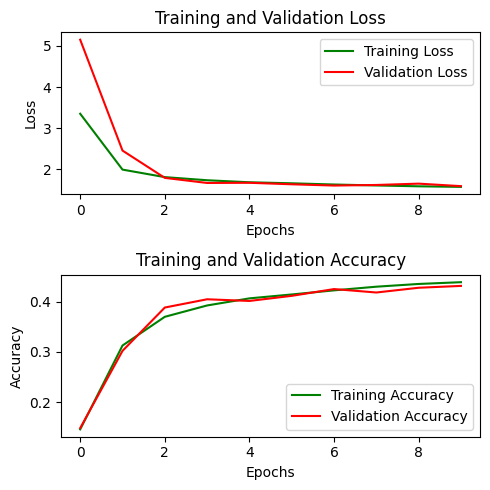

In [ ]:
# Visualize training and validation performance
f, ax = plt.subplots(2, 1, figsize=(5, 5))

# Plot training and validation loss
ax[0].plot(history_vgg16_v1.history['loss'], color='g', label='Training Loss')
ax[0].plot(history_vgg16_v1.history['val_loss'], color='r', label='Validation Loss')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(history_vgg16_v1.history['accuracy'], color='g', label='Training Accuracy')
ax[1].plot(history_vgg16_v1.history['val_accuracy'], color='r', label='Validation Accuracy')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/best_vgg16_version1.keras")

# Evaluate the saved model on the test set
test_steps = int(np.ceil(len(X_test) / batch_size))
test_loss, test_acc = model.evaluate(test_resized, steps=test_steps)

# Show the model performance
print(model.metrics_names)  # Result[0] is loss, result[1] is accuracy
print(f"Test loss for VGG16-version1: {test_loss}")
print(f"Test accuracy for VGG16-version1: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.4268 - loss: 1.5982
['loss', 'compile_metrics']
Test loss for VGG16-version1: 1.6011263132095337
Test accuracy for VGG16-version1: 0.42500001192092896


**VGG16-version2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras import Input


# Function to load and preprocess MNIST data
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Reshape and normalize the data (add channel dimension and scale)
    x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
    x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

    # Resize images to 32x32 for VGG16 (original size is 28x28)
    x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
    x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test


# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)


# Learning rate scheduler (reduce LR as training progresses)
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)


# Function to build the VGG16-version2 model with enhancements
def build_vgg16_version2():
    model = Sequential([
        Input(shape=(32, 32, 1)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


# Build the enhanced VGG16-version2 model
vgg16_version2 = build_vgg16_version2()

# Compile the model with Adam optimizer and a scheduled learning rate
vgg16_version2.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Callbacks: Learning Rate Scheduler and Early Stopping
callbacks = [
    LearningRateScheduler(lr_scheduler),
    EarlyStopping(patience=5, restore_best_weights=True)
]

# Train the enhanced VGG16-version2 model with data augmentation
history_vgg16_version2 = vgg16_version2.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,  # Train for more epochs
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss_v2, test_acc_v2 = vgg16_version2.evaluate(x_test, y_test, verbose=1)

# Print final test accuracy
print(f"Final test accuracy for enhanced VGG16-version2: {test_acc_v2}")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 52ms/step - accuracy: 0.8029 - loss: 0.6036 - val_accuracy: 0.9849 - val_loss: 0.0461 - learning_rate: 1.0000e-04
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 50ms/step - accuracy: 0.9777 - loss: 0.0769 - val_accuracy: 0.9715 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9814 - loss: 0.0642 - val_accuracy: 0.9882 - val_loss: 0.0436 - learning_rate: 1.0000e-04
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9832 - loss: 0.0597 - val_accuracy: 0.9868 - val_loss: 0.0444 - learning_rate: 1.0000e-04
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9866 - loss: 0.0504 - val_accuracy: 0.9896 - val_loss: 0.0383 - learning_rate: 1.0000e-04
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9883 - loss: 0.0444 - val_accuracy: 0.9816 - val_loss: 0.0712 - learning_rate: 1.0000e-04
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/ste

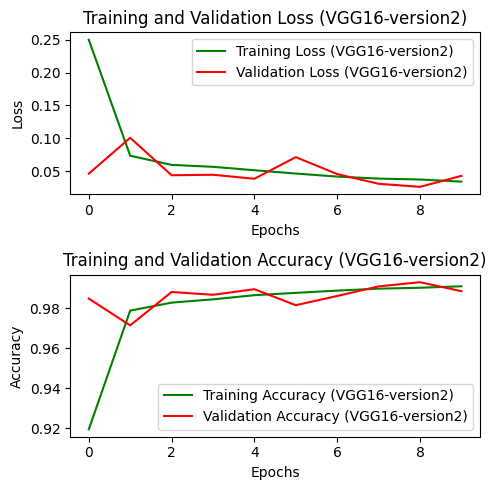

In [ ]:
# Visualize the training process
f, ax = plt.subplots(2, 1, figsize=(5, 5))

# Plot training and validation loss for VGG16-version2
ax[0].plot(history_vgg16_version2.history['loss'], color='g', label='Training Loss (VGG16-version2)') # Use history_vgg16_version2.history['loss'] to access the training loss data
ax[0].plot(history_vgg16_version2.history['val_loss'], color='r', label='Validation Loss (VGG16-version2)') # Use history_vgg16_version2.history['val_loss'] to access the validation loss data
ax[0].set_title('Training and Validation Loss (VGG16-version2)')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot training and validation accuracy for VGG16-version2
ax[1].plot(history_vgg16_version2.history['accuracy'], color='g', label='Training Accuracy (VGG16-version2)') # Use history_vgg16_version2.history['accuracy'] to access the training accuracy data
ax[1].plot(history_vgg16_version2.history['val_accuracy'], color='r', label='Validation Accuracy (VGG16-version2)') # Use history_vgg16_version2.history['val_accuracy'] to access the validation accuracy data
ax[1].set_title('Training and Validation Accuracy (VGG16-version2)')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

Observations on model's effectiveness


I achived a very low accuracy on VGG16-version 1: 43%, which might indicate underfitting, where the model fails to capture complex patterns in the data. After reading a few sources, I decided to change a few things in VGG16-version 2. Area of changes including:

- Input shape: (56,56,3) to (32,32,1) to achieve a faster process
- Adding Data Augmentation function: Using ImageDataGenerator to improve generation
- Changing the Dropout rate: from 0.4 -> 0.5
- Using Early Stopping if validation loss does not imporve
- Changing the Batch size from 256 to 64
- Add Learning Rate Scheduler: futher fine tune model by adjusting learning rate during training process.

Overall, these changes leade to the significant improvement of VGG16-version 2, which results in achiving over 99% accuracy.

References:
Kothari, V. (n.d.). Image Classification of MNIST using VGG16. Kaggle.
https://www.kaggle.com/code/viratkothari/image-classification-of-mnist-using-vgg16

Roy, C. (n.d.). VGG-16 MNIST Classification. Kaggle. Retrieved from
 https://www.kaggle.com/code/chandraroy/vgg-16-mnist-classification

